In [33]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

data = pd.concat([train, test], sort=False)

data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)

In [34]:
age_avg = data['Age'].mean()
age_std = data['Age'].std()

np.random.randint(age_avg - age_std, age_avg + age_std)

30

In [35]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [36]:
data['Age'].median()

28.0

In [37]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [38]:
y_train.head

<bound method NDFrame.head of 0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64>

In [39]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(penalty='l2', solver='sag', random_state=0)

In [40]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/aisyu/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [41]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [45]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

data = pd.concat([train, test], sort=False)

data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)

<AxesSubplot: xlabel='FamilySize', ylabel='count'>

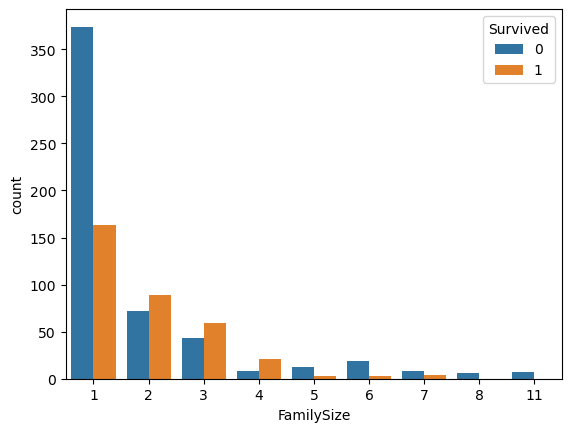

In [46]:
import seaborn as sns


data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
train['FamilySize'] = data['FamilySize'][:len(train)]
test['FamilySize'] = data['FamilySize'][len(train):]
sns.countplot(x='FamilySize', data = train, hue='Survived')

In [47]:
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

train['IsAlone'] = data['IsAlone'][:len(train)]
test['IsAlone'] = data['IsAlone'][len(train):]

In [48]:
data['IsAlone']

0      0
1      0
2      1
3      0
4      1
      ..
413    1
414    1
415    1
416    1
417    0
Name: IsAlone, Length: 1309, dtype: int64

In [49]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [50]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,3,0,22.0,7.2500,0,2,0
1,1,1,38.0,71.2833,1,2,0
2,3,1,26.0,7.9250,0,1,1
3,1,1,35.0,53.1000,0,2,0
4,3,0,35.0,8.0500,0,1,1


In [51]:
sub = pd.read_csv('gender_submission.csv')

In [52]:
clf.fit(X_train, y_train)
y_pred_familysize_isalone = clf.predict(X_test)

sub['Survived'] = list(map(int, y_pred_familysize_isalone))
sub.to_csv('submission_familysize_isalone.csv', index=False)

sub.head()

/home/aisyu/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [53]:
clf.fit(X_train.drop('IsAlone', axis=1), y_train)
y_pred_familysize = clf.predict(X_test.drop('IsAlone', axis=1))

sub['Survived'] = list(map(int, y_pred_familysize))
sub.to_csv('submission_familysize.csv', index=False)

sub.head()

/home/aisyu/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [54]:
clf.fit(X_train.drop(['FamilySize', 'IsAlone'], axis=1), y_train)
y_pred = clf.predict(X_test.drop(['FamilySize', 'IsAlone'], axis=1))

sub['Survived'] = list(map(int, y_pred))
sub.to_csv('submission.csv', index=False)

sub.head()

/home/aisyu/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [1]:
1+2

3

In [ ]:
bmi = 10000　*weight /height/height

90
180
23


In [4]:
int(10000*90/180/180)

27

In [16]:
w=90
genryou=w
h=180
resou =23
for i in range(w):
    bmi = genryou*10000/h/h
    if bmi<=resou:
        print(genryou)
        break
    genryou -= 1
print(w)
print(w-genryou)

74
90
16


In [10]:
int(10000*74/180/180)

22

In [17]:
1/8


0.125

In [ ]:
date,sales,weather,temperature,THI,num_staff
2010/07/10,6667,1,-0.3,7.2,42
2010/07/11,50245,0,7.3,5.5,4
2010/07/12,43677,2,5.7,33.9,36
2010/07/13,90137,2,17.1,4.8,48
2010/07/14,217531,0,38.8,17.9,28
2010/07/15,44585,1,2.6,62.1,18
2010/07/16,101801,1,12,83.2,24
2010/07/17,193824,2,37.3,4.3,21
2010/07/18,122240,3,21.9,27.6,27
2010/07/19,236883,0,38.8,64,47
2010/07/20,192768,2,,,36
2010/07/21,94911,0,13.6,,12
2010/07/22,42461,3,1.9,82.7,37
2010/07/23,228931,0,36.3,75.8,9
2010/07/24,179666,0,27.3,68.7,25
2010/07/25,140849,0,22.2,38.7,27
2010/07/26,14017,2,,95.7,23
2010/07/27,62943,0,9.2,12.4,33
2010/07/28,48681,0,5.9,18.9,23
2010/07/29,196799,3,38.6,0.5,33
2010/07/30,88740,2,9.5,94.8,10
2010/07/31,41719,1,6.2,11.1,18
2010/08/01,61698,1,10.9,1.1,10
2010/08/02,150262,2,27.4,21.9,
2010/08/03,119609,2,20.7,31,13
2010/08/04,86752,3,11.6,69.3,43
2010/08/05,41321,0,2.9,38.2,4
2010/08/06,127855,3,18.8,79,36
2010/08/07,177453,2,26.6,96.5,33
2010/08/08,132265,2,17.9,95.5,25
2010/08/09,36533,1,-1.2,89.5,25
2010/08/10,204059,0,34.6,37.3,29
2010/08/11,214510,0,34.9,58.5,45
2010/08/12,190747,1,31,,26
2010/08/13,185675,2,31.5,56,30
2010/08/14,235014,2,39.9,70.6,30
2010/08/15,201095,0,31.4,69.5,25
2010/08/16,74652,2,13.6,10.9,13
2010/08/17,1207,2,-1.8,24.7,10
2010/08/18,147996,0,20.9,71.7,23
2010/08/19,132452,1,22.4,28.7,25
2010/08/20,208393,2,39.9,7.1,39
2010/08/21,85956,2,10.9,70.9,45
2010/08/22,185699,1,32.2,35.5,1
2010/08/23,158396,1,28.5,15.7,37
2010/08/24,238335,3,39.8,84.8,43
2010/08/25,65236,1,3.7,97.8,38
2010/08/26,116283,3,15.5,91.9,32
2010/08/27,95904,2,16.6,24.8,1
2010/08/28,99204,0,14.5,,10


In [19]:
f=open('test.csv')
line=f.readline()
while line:
    print(line.replace('\n',''))
    line=f.readline()
    
f.close()

date,sales,weather,temperature,THI,num_staff
2010/07/10,6667,1,-0.3,7.2,42
2010/07/11,50245,0,7.3,5.5,4
2010/07/12,43677,2,5.7,33.9,36
2010/07/13,90137,2,17.1,4.8,48
2010/07/14,217531,0,38.8,17.9,28
2010/07/15,44585,1,2.6,62.1,18
2010/07/16,101801,1,12,83.2,24
2010/07/17,193824,2,37.3,4.3,21
2010/07/18,122240,3,21.9,27.6,27
2010/07/19,236883,0,38.8,64,47
2010/07/20,192768,2,,,36
2010/07/21,94911,0,13.6,,12
2010/07/22,42461,3,1.9,82.7,37
2010/07/23,228931,0,36.3,75.8,9
2010/07/24,179666,0,27.3,68.7,25
2010/07/25,140849,0,22.2,38.7,27
2010/07/26,14017,2,,95.7,23
2010/07/27,62943,0,9.2,12.4,33
2010/07/28,48681,0,5.9,18.9,23
2010/07/29,196799,3,38.6,0.5,33
2010/07/30,88740,2,9.5,94.8,10
2010/07/31,41719,1,6.2,11.1,18
2010/08/01,61698,1,10.9,1.1,10
2010/08/02,150262,2,27.4,21.9,
2010/08/03,119609,2,20.7,31,13
2010/08/04,86752,3,11.6,69.3,43
2010/08/05,41321,0,2.9,38.2,4
2010/08/06,127855,3,18.8,79,36
2010/08/07,177453,2,26.6,96.5,33
2010/08/08,132265,2,17.9,95.5,25
2010/08/09,36533,1,-1.2,8